In [30]:
import pandas as pd

# Récupérer df depuis le store
%store -r df

df.head()


,Cle,Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,...,Anciennete_domicile,Biens,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Cible
0,1.0,1.0,6.0,A34,A43,1169.0,0.0,5.0,4.0,A93,...,4.0,A121,67.0,A143,A152,2.0,A173,1.0,A192,0
1,2.0,2.0,48.0,A32,A43,5951.0,1.0,3.0,2.0,A92,...,2.0,A121,22.0,A143,A152,1.0,A173,1.0,A191,1
2,3.0,4.0,12.0,A34,A46,2096.0,1.0,4.0,2.0,A93,...,3.0,A121,49.0,A143,A152,1.0,A172,2.0,A191,0
3,4.0,1.0,42.0,A32,A42,7882.0,1.0,4.0,2.0,A93,...,4.0,A122,45.0,A143,A153,1.0,A173,2.0,A191,0
4,5.0,1.0,24.0,A33,A40,4870.0,1.0,3.0,3.0,A93,...,4.0,A124,53.0,A143,A153,2.0,A173,2.0,A191,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Cle                  988 non-null    category
 1   Comptes              988 non-null    category
 2   Duree_credit         988 non-null    category
 3   Historique_credit    988 non-null    category
 4   Objet_credit         988 non-null    category
 5   Montant_credit       988 non-null    category
 6   Epargne              988 non-null    category
 7   Anciennete_emploi    988 non-null    category
 8   Taux_effort          988 non-null    category
 9   Situation_familiale  988 non-null    category
 10  Garanties            988 non-null    category
 11  Anciennete_domicile  988 non-null    category
 12  Biens                988 non-null    category
 13  Age                  988 non-null    float64 
 14  Autres_credits       988 non-null    category
 15  Statut_domicile      988 non

### Transformation des types de variables

In [ ]:
# Transformer les types

# Définir les colonnes numériques
num_cols = ["Age", "Duree_credit", "Montant_credit"]

# Boucle sur toutes les colonnes
for col in df.columns:
    if col not in num_cols:
        # Convertir seulement si ce n'est pas dans num_cols
        df[col] = df[col].astype('category')
    else:
        # S'assurer que les colonnes numériques sont bien float
        df[col] = df[col].astype('float64')

# Vérification
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Cle                  988 non-null    category
 1   Comptes              988 non-null    category
 2   Duree_credit         988 non-null    float64 
 3   Historique_credit    988 non-null    category
 4   Objet_credit         988 non-null    category
 5   Montant_credit       988 non-null    float64 
 6   Epargne              988 non-null    category
 7   Anciennete_emploi    988 non-null    category
 8   Taux_effort          988 non-null    category
 9   Situation_familiale  988 non-null    category
 10  Garanties            988 non-null    category
 11  Anciennete_domicile  988 non-null    category
 12  Biens                988 non-null    category
 13  Age                  988 non-null    float64 
 14  Autres_credits       988 non-null    category
 15  Statut_domicile      988 non

Pour préparer le jeu de données à l'analyse et à la modélisation, les colonnes ont été séparées en **numériques** et **catégorielles** :

- Les colonnes `"Age"`, `"Duree_credit"` et `"Montant_credit"` sont conservées comme **numériques** (`float64`) car elles sont continues et permettent d'effectuer des calculs statistiques et d'alimenter directement les modèles linéaires.

- Toutes les autres colonnes ont été converties en **catégorielles** (`category`). Certaines de ces colonnes peuvent sembler numériques mais elles sont en réalité **discrètes** et représentent des catégories (par exemple : `Nb_credits`, `Anciennete_emploi`). Les raisons principales de cette conversion sont :
  1. **Respect de la nature des données** : les valeurs représentent des catégories et non des quantités continues, donc les traiter comme numériques pourrait induire en erreur l'interprétation ou le modèle.
  2. **Optimisation mémoire** : les colonnes catégorielles utilisent moins de mémoire que les colonnes numériques.
  3. **Préparation pour les modèles** : les modèles comme Logistic Regression, Random Forest ou CatBoost gèrent mieux les variables catégorielles via One-Hot Encoding ou encodage interne, ce qui permet une meilleure performance et interprétation.

Cette transformation assure que chaque variable est traitée selon sa nature réelle et prépare le dataset pour les étapes suivantes de modélisation statistique et machine learning.


### Statistiques descriptives univariées

In [46]:
# Statistiques descriptives univariées numériques 

num_stats = df[num_cols].describe().T
num_stats['variance'] = df[num_cols].var()
num_stats['skewness'] = df[num_cols].skew()
num_stats['kurtosis'] = df[num_cols].kurt()
num_stats['missing'] = df[num_cols].isna().sum()

print(num_stats)


                count         mean          std    min     25%     50%  \
Age             988.0    35.487854    11.320909   19.0    27.0    33.0   
Duree_credit    988.0    20.707490    11.814184    4.0    12.0    18.0   
Montant_credit  988.0  3204.582996  2672.161434  250.0  1365.5  2302.5   

                   75%      max      variance  skewness  kurtosis  missing  
Age               42.0     75.0  1.281630e+02  1.032863  0.645763        0  
Duree_credit      24.0     60.0  1.395749e+02  1.058535  0.771471        0  
Montant_credit  3951.5  14896.0  7.140447e+06  1.794853  3.341692        0  


Après suppression des valeurs atypiques, les variables numériques `"Age"`, `"Duree_credit"` et `"Montant_credit"` ont été analysées pour mieux refléter la population typique des clients.

- **Age** : moyenne ≈ 35 ans, médiane = 33 ans, distribution légèrement asymétrique vers les âges plus élevés (skew ≈ 1.03).

- **Durée du crédit** : moyenne ≈ 20.7 mois, médiane = 18 mois, légère asymétrie positive (skew ≈ 1.06). Les valeurs extrêmes ont été éliminées, facilitant l'analyse des durées typiques.

- **Montant du crédit** : moyenne ≈ 3204.5, médiane = 2302.5, distribution toujours légèrement asymétrique (skew ≈ 1.79) mais sans les très gros crédits qui pouvaient fausser les statistiques.

**Intérêt** :  
1. Fournir une vision plus réaliste et représentative de la population typique.  
2. Faciliter l’analyse et la modélisation en réduisant l’influence des valeurs extrêmes.  
3. Permettre des comparaisons et interprétations fiables lors de la modélisation statistique ou machine learning.


In [41]:
# Sélectionner les colonnes catégorielles
cat_cols = df.select_dtypes(include='category').columns
cat_cols = cat_cols.drop('Cle')

# Statistiques de base pour chaque catégorie

for col in cat_cols:
    print(f"=== {col} ===")
    print(df[col].value_counts(dropna=False))   # fréquence de chaque modalité
    print(df[col].value_counts(normalize=True)) # pourcentage
    print("\n")


=== Comptes ===
Comptes
4.0    391
1.0    271
2.0    263
3.0     63
Name: count, dtype: int64
Comptes
4.0    0.395749
1.0    0.274291
2.0    0.266194
3.0    0.063765
Name: proportion, dtype: float64


=== Historique_credit ===
Historique_credit
A32    525
A34    290
A33     86
A31     49
A30     38
Name: count, dtype: int64
Historique_credit
A32    0.531377
A34    0.293522
A33    0.087045
A31    0.049595
A30    0.038462
Name: proportion, dtype: float64


=== Objet_credit ===
Objet_credit
A43    276
A40    233
A42    180
A41    113
A49     94
A46     50
A45     21
A44     12
A48      9
Name: count, dtype: int64
Objet_credit
A43    0.279352
A40    0.235830
A42    0.182186
A41    0.114372
A49    0.095142
A46    0.050607
A45    0.021255
A44    0.012146
A48    0.009109
Name: proportion, dtype: float64


=== Epargne ===
Epargne
1.0    596
0.0    181
2.0    100
3.0     63
4.0     48
Name: count, dtype: int64
Epargne
1.0    0.603239
0.0    0.183198
2.0    0.101215
3.0    0.063765
4.0    0.0485

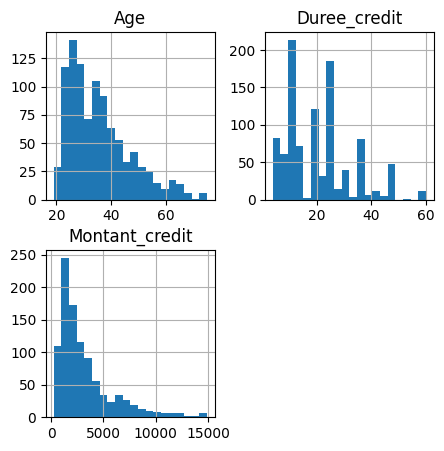

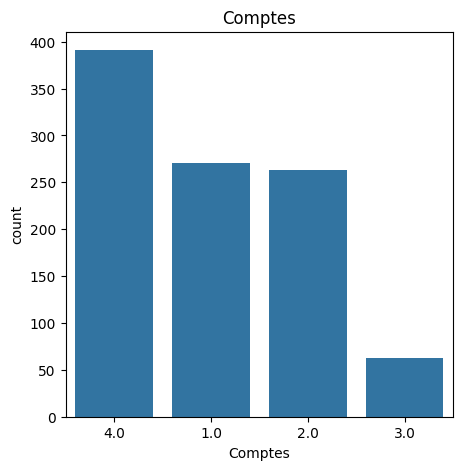

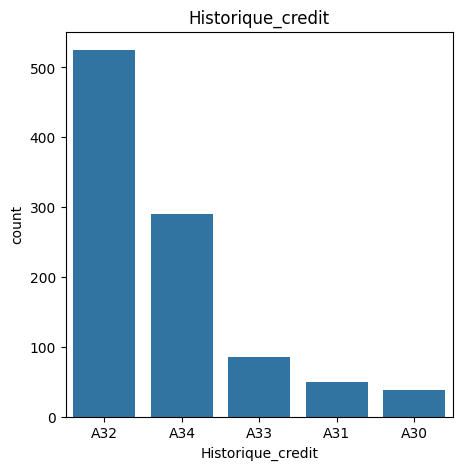

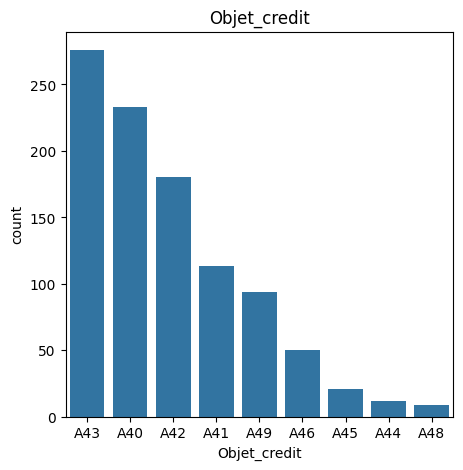

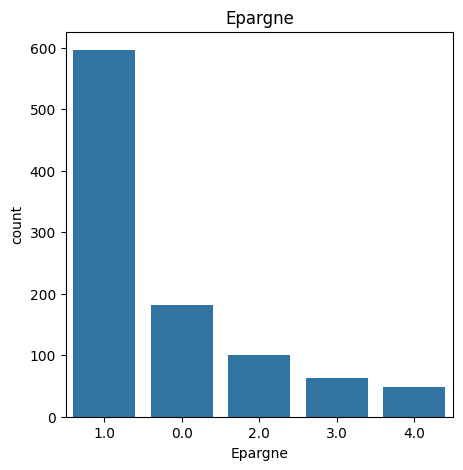

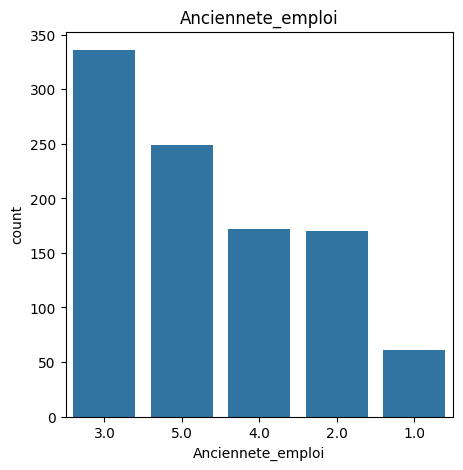

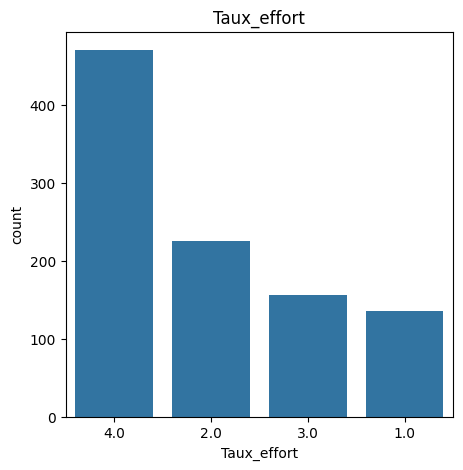

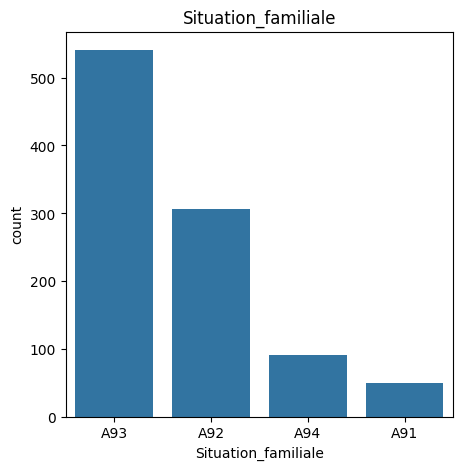

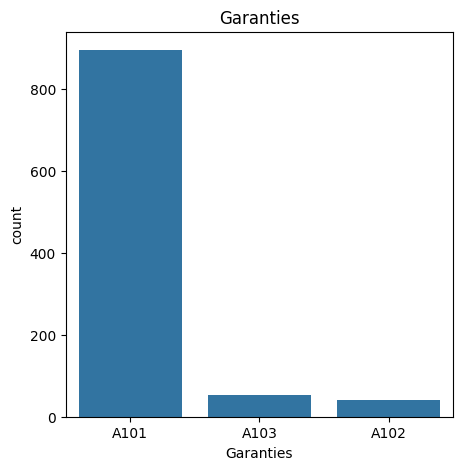

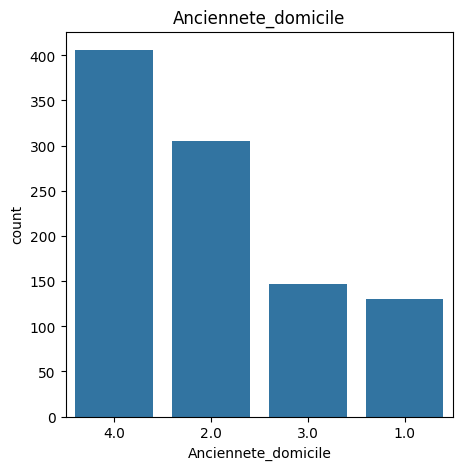

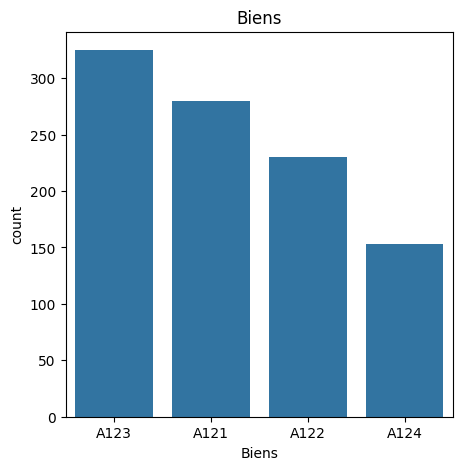

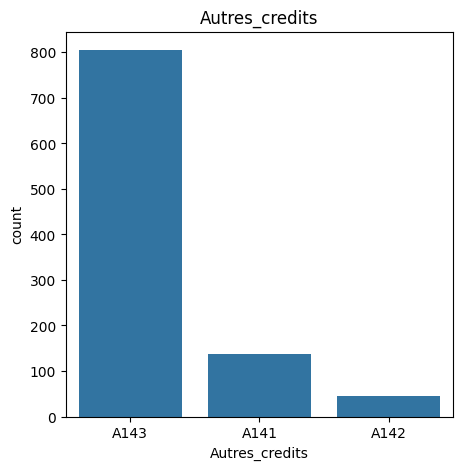

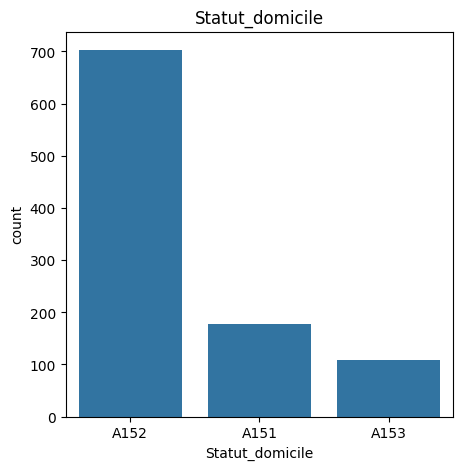

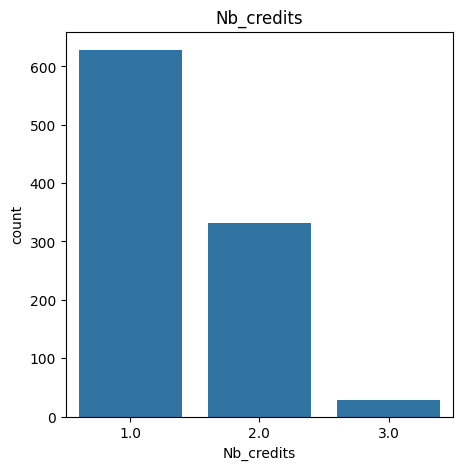

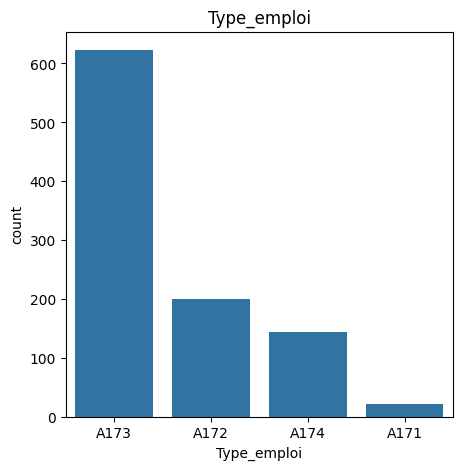

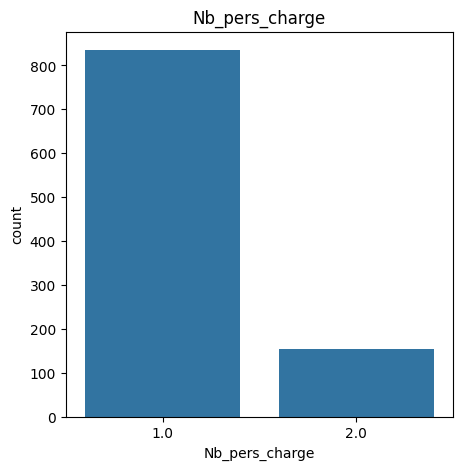

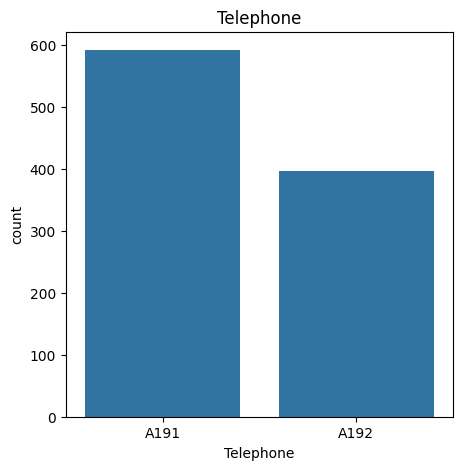

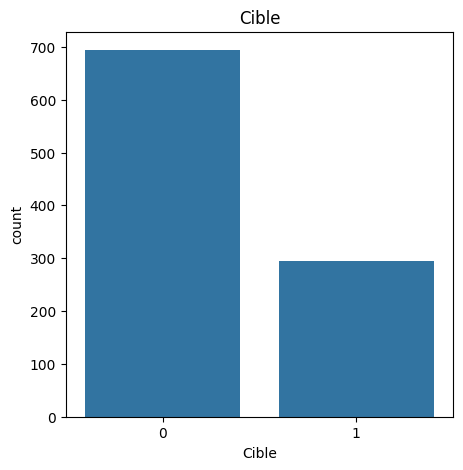

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution numérique
df[num_cols].hist(bins=20, figsize=(5,5))
plt.show()

# Distribution catégorielle (bar plot pour chaque variable catégorielle)
for col in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.show()


In [45]:
df_2 = df.copy()

%store df_2

Stored 'df_2' (DataFrame)
